# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
#!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
test_cities = ["New York","Chicago","Los Angeles"]
query_url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="      
#print(query_url + test_cities[1])
weather_info = []
#for x in test_cities:
for x in cities:
    url = query_url + x
    result = requests.get(url).json()
  #  print(result)
    try:
        weather = {
            "City": result["name"] , 
            "Lat": result["coord"]["lat"],
            "Lng": result["coord"]["lon"],
            "Max Temp": result["main"]["temp_max"],
            "Humidity": result["main"]["humidity"],
            "Cloudiness": result["clouds"]["all"],
            "Wind Speed": result["wind"]["speed"],
            "Country": result["sys"]["country"],
            "Date": result["dt"],
        }
        weather_info.append(weather)
    except:
        print(f"{x} not found")
    
weather_info





gangotri not found
kazalinsk not found
deshna not found
karkaralinsk not found
palabuhanratu not found
warqla not found
pavda not found
umzimvubu not found
belushya guba not found
nizhneyansk not found
barentsburg not found
attawapiskat not found
dolbeau not found
tabiauea not found
ketchenery not found
mys shmidta not found
sofiysk not found
amderma not found
artyk not found
tsihombe not found
viligili not found
ruatoria not found
illoqqortoormiut not found
geresk not found
kadykchan not found
sentyabrskiy not found
wahran not found
qibili not found
tabukiniberu not found
vaitupu not found
dzhusaly not found
taolanaro not found
gazni not found
samusu not found
tumannyy not found
siwani not found
halalo not found
marcona not found
urfa not found
monatele not found
bacuit not found
bolungarvik not found
shchelyayur not found
yanan not found
eldikan not found
karaul not found
hvammstangi not found
naftah not found
grand river south east not found
talesh not found
ambodifototra not found


[{'City': 'Saskylakh',
  'Lat': 71.92,
  'Lng': 114.08,
  'Max Temp': 49.51,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 20.47,
  'Country': 'RU',
  'Date': 1593700487},
 {'City': 'Abadan',
  'Lat': 38.05,
  'Lng': 58.21,
  'Max Temp': 96.8,
  'Humidity': 16,
  'Cloudiness': 75,
  'Wind Speed': 9.17,
  'Country': 'TM',
  'Date': 1593700487},
 {'City': 'Cape Town',
  'Lat': -33.93,
  'Lng': 18.42,
  'Max Temp': 64,
  'Humidity': 87,
  'Cloudiness': 75,
  'Wind Speed': 2.24,
  'Country': 'ZA',
  'Date': 1593700310},
 {'City': 'Puerto Ayora',
  'Lat': -0.74,
  'Lng': -90.35,
  'Max Temp': 72,
  'Humidity': 86,
  'Cloudiness': 99,
  'Wind Speed': 3,
  'Country': 'EC',
  'Date': 1593700488},
 {'City': 'Provideniya',
  'Lat': 64.38,
  'Lng': -173.3,
  'Max Temp': 43.59,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 5.86,
  'Country': 'RU',
  'Date': 1593700488},
 {'City': 'Black River',
  'Lat': 18.03,
  'Lng': -77.85,
  'Max Temp': 88,
  'Humidity': 74,
  'Cloudiness': 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather_info)
weather_df
weather_df.to_csv(output_data_file, index=False)
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.92,114.08,49.51,84,100,20.47,RU,1593700487
1,Abadan,38.05,58.21,96.80,16,75,9.17,TM,1593700487
2,Cape Town,-33.93,18.42,64.00,87,75,2.24,ZA,1593700310
3,Puerto Ayora,-0.74,-90.35,72.00,86,99,3.00,EC,1593700488
4,Provideniya,64.38,-173.30,43.59,96,100,5.86,RU,1593700488


In [5]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,19.645263,19.419568,68.956654,66.742481,47.687970,8.358910,1.592139e+09
std,32.968088,93.616990,16.658671,23.438734,39.568059,5.348626,9.184801e+01
min,-54.800000,-179.170000,26.600000,3.000000,0.000000,0.400000,1.592138e+09
25%,-6.257500,-64.150000,56.665000,54.000000,1.000000,4.225000,1.592139e+09
50%,22.630000,25.600000,71.600000,73.000000,40.500000,7.135000,1.592139e+09
75%,46.445000,102.667500,80.600000,85.250000,90.000000,11.410000,1.592139e+09
max,78.220000,179.320000,115.030000,100.000000,100.000000,31.090000,1.592139e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
humidity_over = weather_df.loc[weather_df["Humidity"] > 100]
#humidity_over.head()

humidity_over.index[humidity_over['Humidity']].tolist()
humidity_over.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.loc[weather_df["Humidity"] <= 100]


In [7]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
#output_data_file_2 = "output_data/city_data.csv"

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

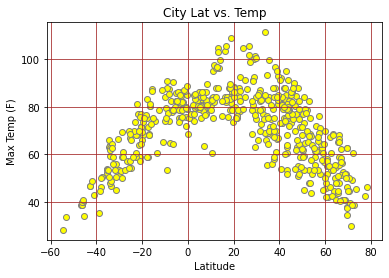

In [9]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="gray",facecolors="yellow")
plt.title("City Lat vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="brown")
plt.savefig("output_data/Fig1.png")
plt.show()

# As you get farther away from 0 latitude, the teperature either gets warmer or colder.

## Latitude vs. Humidity Plot

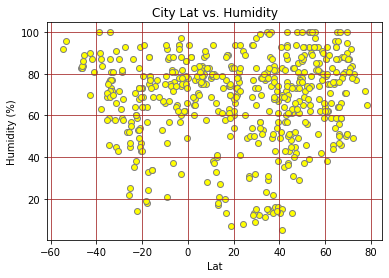

In [10]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="gray",facecolors="yellow")
plt.title("City Lat vs. Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="brown")
plt.savefig("output_data/Fig2.png")
plt.show()


#  Humidity can reach 100% during the heat or cold

## Latitude vs. Cloudiness Plot

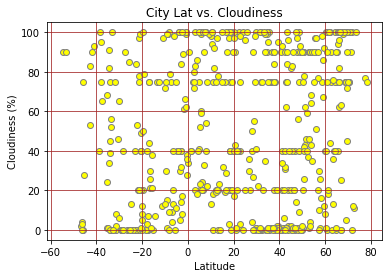

In [11]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="gray",facecolors="yellow")
plt.title("City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="brown")
plt.savefig("output_data/Fig3.png")
plt.show()

#Cloudiness does not follow latitude

## Latitude vs. Wind Speed Plot

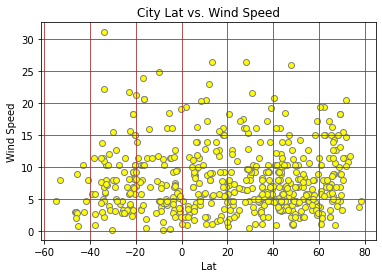

In [12]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="gray",facecolors="yellow")
plt.title("City Lat vs. Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="brown")
plt.savefig("output_data/Fig4.png")
plt.show()

# Wind speed is has is highest in higher latitude

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern = clean_city_data.loc[clean_city_data["Lng"] >= 0]
northern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.92,114.08,49.51,84,100,20.47,RU,1593700487
1,Abadan,38.05,58.21,96.80,16,75,9.17,TM,1593700487
2,Cape Town,-33.93,18.42,64.00,87,75,2.24,ZA,1593700310
7,Pundaguitan,6.37,126.17,83.25,76,100,9.75,PH,1593700490
9,Galle,6.04,80.22,81.28,84,24,8.72,LK,1593700490
...,...,...,...,...,...,...,...,...,...
530,Alakurtti,66.97,30.35,57.00,59,63,1.01,RU,1593700676
531,Skjervøy,70.03,20.97,44.60,87,75,3.36,NO,1593700677
533,Karaton,-6.34,106.10,78.80,88,40,4.70,ID,1593700678
534,Zhezkazgan,47.80,67.71,66.15,63,97,25.90,KZ,1593700678


In [15]:
# Create Northern and Southern Hemisphere DataFrames
southern = clean_city_data.loc[clean_city_data["Lng"] < 0]
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Puerto Ayora,-0.74,-90.35,72.00,86,99,3.00,EC,1593700488
4,Provideniya,64.38,-173.30,43.59,96,100,5.86,RU,1593700488
5,Black River,18.03,-77.85,88.00,74,20,14.99,JM,1593700489
6,Ushuaia,-54.80,-68.30,28.40,92,90,4.70,AR,1593700489
8,Lompoc,34.64,-120.46,55.40,100,90,3.36,US,1593700490
...,...,...,...,...,...,...,...,...,...
524,La Ronge,55.10,-105.28,62.60,93,75,12.75,CA,1593700675
525,Palmer,42.16,-72.33,80.01,69,20,3.74,US,1593700675
526,Vestmannaeyjar,63.44,-20.27,53.60,76,13,8.05,IS,1593700675
528,Matagami,49.75,-77.63,68.00,100,90,6.93,CA,1593700676


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared is: -0.04932810743016438
Regression line is: y = -0.02x + 71.84


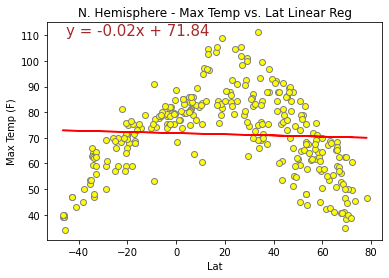

In [21]:
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values, edgecolors="gray",facecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45, 110),fontsize=15,color="brown")
plt.title("N. Hemisphere - Max Temp vs. Lat Linear Reg")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared is: -0.13626274161902358
Regression line is: y = -0.07x + 71.39


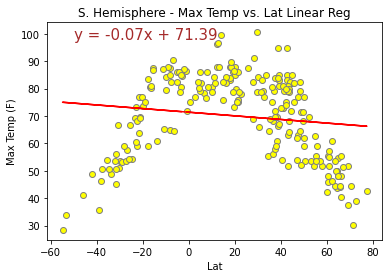

In [25]:
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values, edgecolors="gray",facecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 98),fontsize=15,color="brown")
plt.title("S. Hemisphere - Max Temp vs. Lat Linear Reg")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared is: -0.07446585747791193
Regression line is: y = -0.05x + 67.09


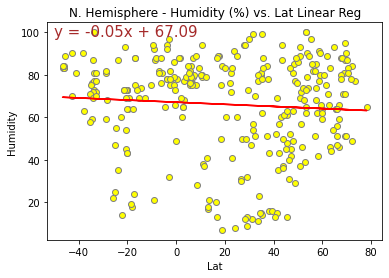

In [27]:
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values, edgecolors="gray",facecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 98),fontsize=15,color="brown")
plt.title("N. Hemisphere - Humidity (%) vs. Lat Linear Reg")
plt.xlabel("Lat")
plt.ylabel("Humidity")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared is: 0.15266604140902795
Regression line is: y = 0.09x + 68.28


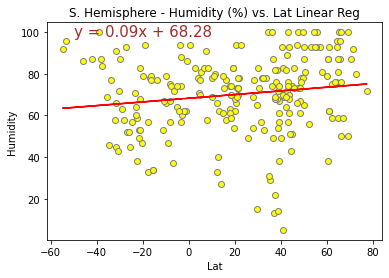

In [28]:
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values, edgecolors="gray",facecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 98),fontsize=15,color="brown")
plt.title("S. Hemisphere - Humidity (%) vs. Lat Linear Reg")
plt.xlabel("Lat")
plt.ylabel("Humidity")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared is: 0.20678392527376865
Regression line is: y = 0.24x + 42.42


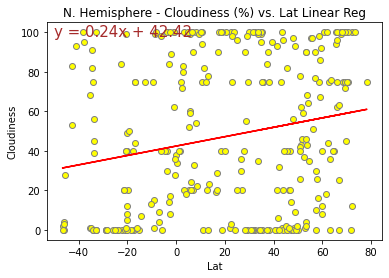

In [31]:
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values, edgecolors="gray",facecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 98),fontsize=15,color="brown")
plt.title("N. Hemisphere - Cloudiness (%) vs. Lat Linear Reg")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared is: 0.04797436014244293
Regression line is: y = 0.06x + 44.21


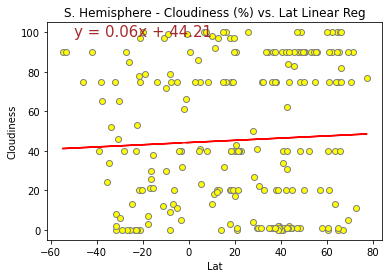

In [33]:
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values, edgecolors="gray",facecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 98),fontsize=15,color="brown")
plt.title("S. Hemisphere - Cloudiness (%) vs. Lat Linear Reg")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared is: 0.009524834710272235
Regression line is: y = 0.0x + 7.82


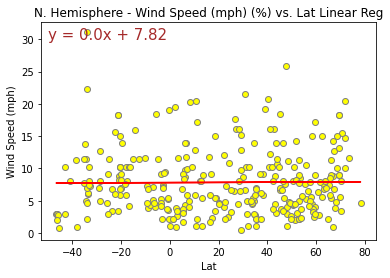

In [36]:
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values, edgecolors="gray",facecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 30),fontsize=15,color="brown")
plt.title("N. Hemisphere - Wind Speed (mph) (%) vs. Lat Linear Reg")
plt.xlabel("Lat")
plt.ylabel("Wind Speed (mph)")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared is: 0.016615746808032437
Regression line is: y = 0.0x + 7.91


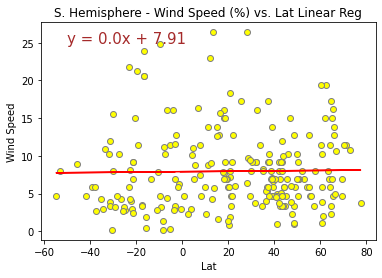

In [43]:
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values, edgecolors="gray",facecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 25),fontsize=15,color="brown")
plt.title("S. Hemisphere - Wind Speed (%) vs. Lat Linear Reg")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()